In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Purpose

In [5]:
# We want to assess each agency performance, in which area they perform, how to represent it? 

In [6]:
report = pd.read_excel('../data.xlsx', sheet_name="Document Report")
clients = pd.read_excel('../data.xlsx', sheet_name="Clients")
h_a = pd.read_excel('../data.xlsx', sheet_name="Human Agent")

In [7]:
report.head()

,Report ID,Client ID,Fraud Result,Document Type,Issuing country,Report Completed Date,Report Turn-Around-Time (secs)
0,102730387.0,14.0,Clear,Passport,Philippines,2021-02-11,147.0
1,138965999.0,15.0,Clear,Passport,United Kingdom of Great Britain and Northern I...,2021-03-13,260.0
2,117919008.0,19.0,Suspected,Driving Licence,United States of America,2021-01-13,160.0
3,123459413.0,3.0,Clear,Passport,Lithuania,2021-01-30,200.0
4,109493562.0,7.0,Clear,Driving Licence,France,2021-03-28,373.0


In [8]:
clients.head()

,Client ID,Industry,Country
0,1.0,Banking,United Kingdom of Great Britain and Northern I...
1,2.0,Banking,United Kingdom of Great Britain and Northern I...
2,3.0,Banking,France
3,4.0,Banking,Spain
4,5.0,Banking,Portugal


In [9]:
h_a.head()

,Report ID,Task ID,Task Type,Task Turn-Around-Time (secs),Agency (Manual Processing Organisation),Agent Seniority
0,136115188.0,69038945.0,Fraud Assessment,39.0,3.0,Junior
1,124025203.0,60575464.0,Extraction,118.0,3.0,Junior
2,113034309.0,52564826.0,Fraud Assessment,35.0,3.0,Junior
3,133661310.0,67305979.0,Extraction,86.0,3.0,Junior
4,133800920.0,67408713.0,Fraud Assessment,51.0,3.0,Junior


# Dtypes check

In [10]:
report.dtypes

Report ID                                float64
Client ID                                float64
Fraud Result                              object
Document Type                             object
Issuing country                           object
Report Completed Date             datetime64[ns]
Report Turn-Around-Time (secs)           float64
dtype: object

In [11]:
report['Report ID'] = report['Report ID'].astype(int)
report['Client ID'] = report['Client ID'].astype(int)

In [12]:
clients.dtypes

Client ID    float64
Industry      object
Country       object
dtype: object

In [13]:
clients['Client ID'] = clients['Client ID'].astype(int)

In [14]:
h_a.dtypes

Report ID                                  float64
Task ID                                    float64
Task Type                                   object
Task Turn-Around-Time (secs)               float64
Agency (Manual Processing Organisation)    float64
Agent Seniority                             object
dtype: object

In [15]:
h_a['Report ID'] = h_a['Report ID'].astype(int)
h_a['Task ID'] = h_a['Task ID'].astype(int)
h_a['Agency (Manual Processing Organisation)'] = h_a['Agency (Manual Processing Organisation)'].astype(int)

# Categoricals check

In [16]:
for col in report.select_dtypes('object').columns:
    print(pd.DataFrame(report[col].value_counts()), '\n')

                     Fraud Result
Clear                       37751
Cannot be processed          6108
Suspected                    5954 

                  Document Type
Driving Licence           14856
Passport                  14378
National ID                9143
Not Available              6108
Residence Permit           2487
Visa                       1921
Tax ID                      920 

                                                    Issuing country
United States of America                                      11094
India                                                          6340
United Kingdom of Great Britain and Northern Ir...             6241
Not Available                                                  6108
China                                                          2868
...                                                             ...
Turkmenistan                                                      1
Vanuatu                                                     

In [17]:
for col in clients.select_dtypes('object').columns:
    print(pd.DataFrame(clients[col].value_counts()), '\n')

                 Industry
Banking                11
Crypto Currency         4
Car Rental              4
Remittance              4
Insurance               3
E-commerce              2
Gaming                  2 

                                                    Country
United States of America                                  7
United Kingdom of Great Britain and Northern Ir...        6
France                                                    4
Germany                                                   3
Italy                                                     3
Spain                                                     2
Portugal                                                  1
Russia                                                    1
Canada                                                    1
Austria                                                   1
Hong Kong                                                 1 



In [18]:
for col in h_a.select_dtypes('object').columns:
    print(pd.DataFrame(h_a[col].value_counts()), '\n')

                  Task Type
Fraud Assessment      47975
Extraction            46176
Classification        19900 

        Agent Seniority
Junior            72689
Senior            41362 



# Global Performance, overall tasks

In [ ]:
# We say that overall performance is the daily number of tasks completed by an agency for a given day

In [44]:
work_df = h_a.merge(report, how = 'left', on = 'Report ID')

In [45]:
overall_perf = work_df.groupby(['Agency (Manual Processing Organisation)','Report Completed Date'])\
                      .agg({'Report ID': 'nunique'})

In [50]:
total_tasks = work_df.groupby('Report Completed Date').agg({'Report ID': 'nunique'})

In [51]:
overall_perf_ratio = overall_perf.reset_index().set_index('Report Completed Date')\
                        .merge(total_tasks, 
                               how = 'inner', on = 'Report Completed Date')

In [52]:
overall_perf_ratio['Completed Ratio'] = (overall_perf_ratio['Report ID_x']/overall_perf_ratio['Report ID_y'])*100

In [57]:
overall_perf_ratio = overall_perf_ratio \
                        .reset_index() \
                        .set_index(['Agency (Manual Processing Organisation)','Report Completed Date']) \
                        .rename(columns = {'Report ID_x': 'Number of daily tasks', 
                                           'Report ID_y': 'Total Number of Tasks'})

In [65]:
overall_perf_ratio.head(2)

,,Number of daily tasks,Total Number of Tasks,Completed Ratio
Agency (Manual Processing Organisation),Report Completed Date,,,
1,2021-01-01,181,293,61.774744
2,2021-01-01,47,293,16.040956


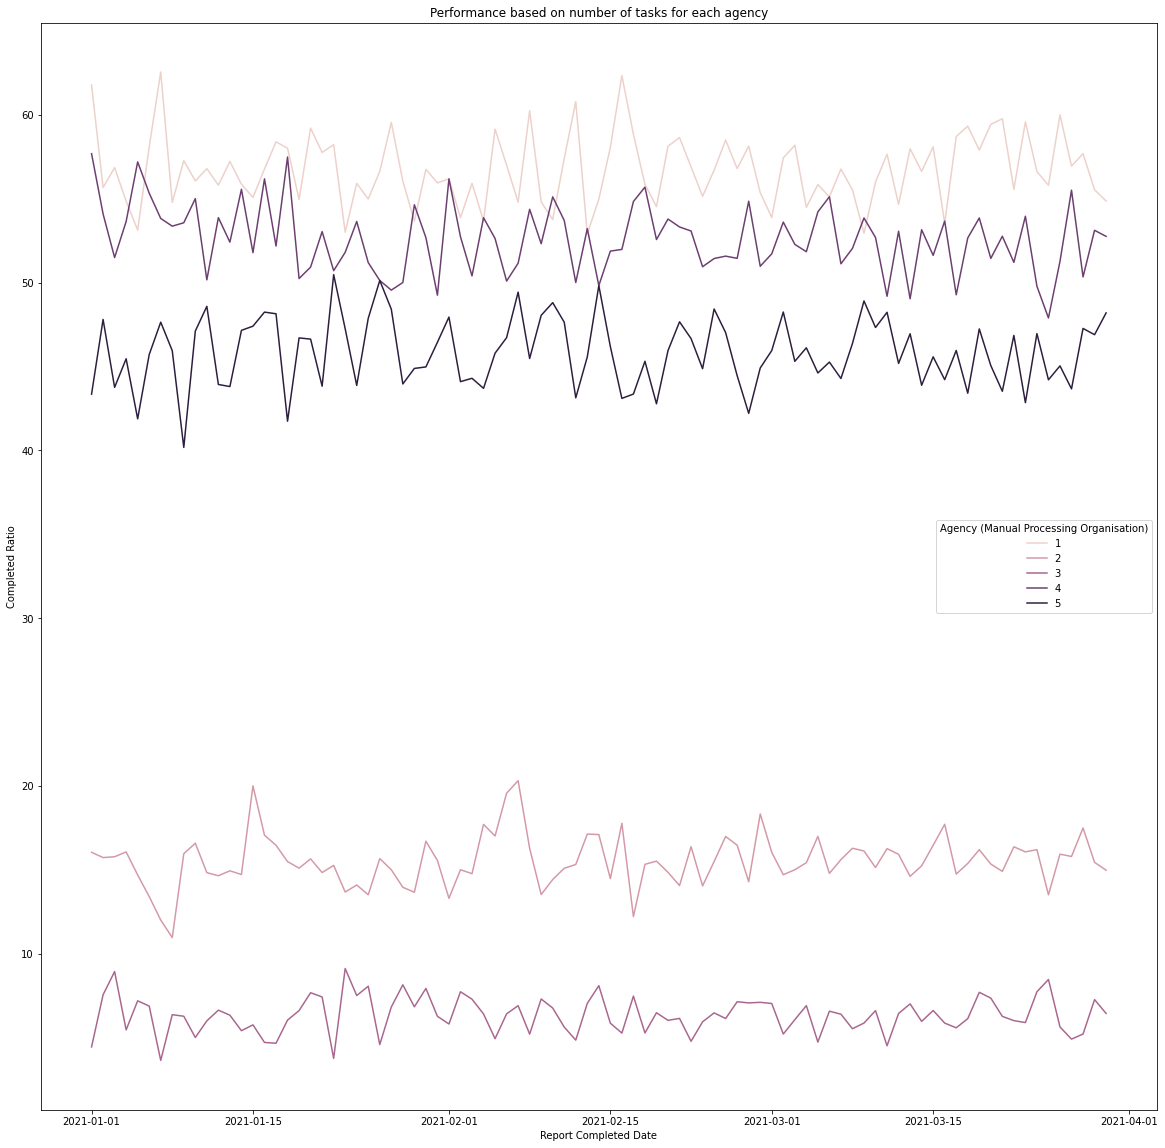

In [64]:
fig, ax = plt.subplots(figsize = (20,20))

ax.set_title('Performance based on number of tasks for each agency')
ax = sns.lineplot(x = 'Report Completed Date', y = 'Completed Ratio', 
                     data = overall_perf_ratio, 
                     hue = 'Agency (Manual Processing Organisation)')

# Performance for each tasks

# Scatterplots of performance?

In [18]:
tmp = report.merge(h_a, how = 'left', on = 'Report ID')

In [42]:
e = tmp.groupby('Report ID').agg({'Agency (Manual Processing Organisation)':'nunique'})

In [43]:
e

,Agency (Manual Processing Organisation)
Report ID,
42065,2
42932,1
48224,1
49097,2
49722,2
...,...
139247496,2
139248339,2
139248970,2


In [44]:
e[e['Agency (Manual Processing Organisation)'] == 3]

,Agency (Manual Processing Organisation)
Report ID,
50919,3
51893,3
357769,3
361015,3
368271,3
...,...
139200550,3
139201299,3
139201562,3


In [45]:
e[e['Agency (Manual Processing Organisation)'] != 3]

,Agency (Manual Processing Organisation)
Report ID,
42065,2
42932,1
48224,1
49097,2
49722,2
...,...
139247496,2
139248339,2
139248970,2


In [47]:
pp = tmp.groupby('Report ID').agg({'Task ID': 'nunique'})

In [48]:
pp[pp['Task ID'] == 3]

,Task ID
Report ID,
42065,3
48224,3
49097,3
49722,3
50182,3
...,...
139234306,3
139236007,3
139236394,3


In [49]:
pp[pp['Task ID'] != 3]

,Task ID
Report ID,
42932,2
50902,2
51426,2
361427,1
365839,1
...,...
139246666,1
139248339,2
139248970,2


In [25]:
tmp[tmp['Report ID'] == 139248970]

,Report ID,Client ID,Fraud Result,Document Type,Issuing country,Report Completed Date,Report Turn-Around-Time (secs),Task ID,Task Type,Task Turn-Around-Time (secs),Agency (Manual Processing Organisation),Agent Seniority
58455,139248970,29,Clear,Passport,United Kingdom of Great Britain and Northern I...,2021-03-21,230.0,71298001,Extraction,165.0,4,Junior
58456,139248970,29,Clear,Passport,United Kingdom of Great Britain and Northern I...,2021-03-21,230.0,71298002,Fraud Assessment,32.0,5,Junior


In [31]:
a = tmp[tmp['Task Type'] == 'Extraction']['Task Turn-Around-Time (secs)'].values

In [39]:
Q1 = tmp[tmp['Task Type'] == 'Extraction']['Task Turn-Around-Time (secs)'].quantile(0.02)
Q3 = tmp[tmp['Task Type'] == 'Extraction']['Task Turn-Around-Time (secs)'].quantile(0.98)
IQR = Q3 - Q1
b = tmp[tmp['Task Type'] == 'Extraction'][(tmp[tmp['Task Type'] == 'Extraction']['Task Turn-Around-Time (secs)'] < (Q1 - 1.5 * IQR)) 
                                      | (tmp[tmp['Task Type'] == 'Extraction']['Task Turn-Around-Time (secs)'] > (Q3 + 1.5 * IQR))]

In [41]:
b.sort_values(by = 'Task Turn-Around-Time (secs)')

,Report ID,Client ID,Fraud Result,Document Type,Issuing country,Report Completed Date,Report Turn-Around-Time (secs),Task ID,Task Type,Task Turn-Around-Time (secs),Agency (Manual Processing Organisation),Agent Seniority
23192,133292249,14,Clear,Residence Permit,Brazil,2021-03-24,4067.0,67046539,Extraction,2046.0,1,Junior
94577,105942430,14,Cannot be processed,Not Available,Not Available,2021-03-21,3962.0,46928637,Extraction,2048.0,4,Senior
14670,103059485,19,Cannot be processed,Not Available,Not Available,2021-02-05,2156.0,44852899,Extraction,2054.0,1,Junior
79193,133283297,15,Clear,National ID,United States of America,2021-03-26,3477.0,67040178,Extraction,2056.0,1,Junior
26018,133287718,19,Suspected,Driving Licence,Serbia,2021-01-23,4268.0,67043267,Extraction,2072.0,1,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...
71198,102032146,21,Clear,National ID,Poland,2021-02-10,1156577.0,44625691,Extraction,770618.0,4,Junior
93551,102287920,13,Cannot be processed,Not Available,Not Available,2021-02-07,1174328.0,44639823,Extraction,771547.0,4,Junior
8091,102324580,28,Clear,Residence Permit,United States of America,2021-02-27,1064194.0,44645727,Extraction,772247.0,4,Junior
1140,102572367,12,Clear,Passport,Belarus,2021-02-19,2404099.0,44669277,Extraction,792774.0,4,Junior


In [32]:
max(tmp['Task Turn-Around-Time (secs)'])

2704961.0

In [34]:
2704961/60/60/24

31.30741898148148

In [33]:
min(tmp['Task Turn-Around-Time (secs)'])

-59.0

In [20]:
tmp = report.merge(h_a, how = 'left', on = 'Report ID')

In [31]:
tmp.groupby('Task Type').agg({'Task Turn-Around-Time (secs)': [np.nanmean,np.nanstd,np.nanmedian,np.nanmin,np.nanmax]})

Task Turn-Around-Time (secs)                                 \
                                      nanmean        nanstd nanmedian nanmin   
Task Type                                                                      
Classification                    1967.774109  52766.312148      34.0  -12.0   
Extraction                         595.528198  14882.040176      75.0  -59.0   
Fraud Assessment                  3596.344194  77633.507858      47.0  -48.0   

                             
                     nanmax  
Task Type                    
Classification    2641080.0  
Extraction         924197.0  
Fraud Assessment  2704961.0

<AxesSubplot:xlabel='Task Type', ylabel='Task Turn-Around-Time (secs)'>

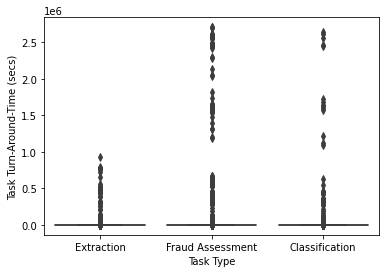

In [29]:
sns.boxplot(x = 'Task Type', y = 'Task Turn-Around-Time (secs)', data = tmp)

In [ ]:
# pour chaque agence, voir la freq journaliere d'assessment hors outliers?

In [52]:
tmp

,Report ID,Client ID,Fraud Result,Document Type,Issuing country,Report Completed Date,Report Turn-Around-Time (secs),Task ID,Task Type,Task Turn-Around-Time (secs),Agency (Manual Processing Organisation),Agent Seniority
0,102730387,14,Clear,Passport,Philippines,2021-02-11,147.0,44620808,Extraction,58.0,2,Senior
1,102730387,14,Clear,Passport,Philippines,2021-02-11,147.0,44620809,Fraud Assessment,14.0,2,Senior
2,102730387,14,Clear,Passport,Philippines,2021-02-11,147.0,44620727,Classification,35.0,5,Junior
3,138965999,15,Clear,Passport,United Kingdom of Great Britain and Northern I...,2021-03-13,260.0,71089638,Extraction,78.0,1,Junior
4,138965999,15,Clear,Passport,United Kingdom of Great Britain and Northern I...,2021-03-13,260.0,71089639,Fraud Assessment,150.0,4,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...
114041,120966099,14,Suspected,Visa,Malaysia,2021-02-09,39.0,58411226,Fraud Assessment,18.0,4,Senior
114042,130900189,13,Suspected,National ID,United States of America,2021-03-27,86.0,65321701,Classification,46.0,5,Junior
114043,122806264,12,Suspected,Driving Licence,France,2021-02-12,436.0,59714821,Classification,415.0,5,Junior
114044,110530415,13,Suspected,National ID,France,2021-03-28,139.0,50532053,Fraud Assessment,49.0,2,Senior


In [54]:
ccc = tmp.groupby(['Agency (Manual Processing Organisation)','Report Completed Date','Task Type']).agg({'Task ID':'nunique'})

In [55]:
ccc

Task ID
Agency (Manual Processing Organisation) Report Completed Date Task Type                
1                                       2021-01-01            Classification         40
                                                              Extraction             95
                                                              Fraud Assessment      103
                                        2021-01-02            Classification         45
                                                              Extraction             90
...                                                                                 ...
5                                       2021-03-29            Extraction            205
                                                              Fraud Assessment      214
                                        2021-03-30            Classification         99
                                                              Extraction            215
                                                              Fraud Assessment      188

[1335 rows x 1 columns]

In [68]:
ddd = ccc.groupby(['Agency (Manual Processing Organisation)','Task Type']).agg({'Task ID':['mean','std','median']})

ddd

Task ID  \
                                                                mean   
Agency (Manual Processing Organisation) Task Type                      
1                                       Classification     73.235955   
                                        Extraction        170.775281   
                                        Fraud Assessment  176.516854   
2                                       Classification     16.606742   
                                        Extraction         37.213483   
                                        Fraud Assessment   38.865169   
3                                       Classification     13.191011   
                                        Extraction         30.932584   
                                        Fraud Assessment   31.786517   
4                                       Classification     65.280899   
                                        Extraction        152.561798   
                                        Fraud Assessment  159.617978   
5                                       Classification     55.269663   
                                        Extraction        127.325843   
                                        Fraud Assessment  132.235955   

                                                                            
                                                                std median  
Agency (Manual Processing Organisation) Task Type                           
1                                       Classification    22.317453   71.0  
                                        Extraction        50.617045  182.0  
                                        Fraud Assessment  52.517121  190.0  
2                                       Classification     7.073668   16.0  
                                        Extraction        12.376179   38.0  
                                        Fraud Assessment  12.900133   40.0  
3                                       Classification     4.958639   13.0  
                                        Extraction         9.916467   31.0  
                                        Fraud Assessment   9.852863   33.0  
4                                       Classification    18.824542   68.0  
                                        Extraction        45.270388  161.0  
                                        Fraud Assessment  43.555217  170.0  
5                                       Classification    17.637617   55.0  
                                        Extraction        36.160242  135.0  
                                        Fraud Assessment  39.367159  143.0

In [77]:
ddd[('Task ID','relative_std')] = ddd[('Task ID','std')]/ddd[('Task ID','mean')]*100
ddd[('Task ID','relative_distance_median')] = np.abs(ddd[('Task ID','mean')] - ddd[('Task ID','median')])/ddd[('Task ID','mean')]*100

In [78]:
ddd

Task ID  \
                                                                mean   
Agency (Manual Processing Organisation) Task Type                      
1                                       Classification     73.235955   
                                        Extraction        170.775281   
                                        Fraud Assessment  176.516854   
2                                       Classification     16.606742   
                                        Extraction         37.213483   
                                        Fraud Assessment   38.865169   
3                                       Classification     13.191011   
                                        Extraction         30.932584   
                                        Fraud Assessment   31.786517   
4                                       Classification     65.280899   
                                        Extraction        152.561798   
                                        Fraud Assessment  159.617978   
5                                       Classification     55.269663   
                                        Extraction        127.325843   
                                        Fraud Assessment  132.235955   

                                                                            \
                                                                std median   
Agency (Manual Processing Organisation) Task Type                            
1                                       Classification    22.317453   71.0   
                                        Extraction        50.617045  182.0   
                                        Fraud Assessment  52.517121  190.0   
2                                       Classification     7.073668   16.0   
                                        Extraction        12.376179   38.0   
                                        Fraud Assessment  12.900133   40.0   
3                                       Classification     4.958639   13.0   
                                        Extraction         9.916467   31.0   
                                        Fraud Assessment   9.852863   33.0   
4                                       Classification    18.824542   68.0   
                                        Extraction        45.270388  161.0   
                                        Fraud Assessment  43.555217  170.0   
5                                       Classification    17.637617   55.0   
                                        Extraction        36.160242  135.0   
                                        Fraud Assessment  39.367159  143.0   

                                                                       \
                                                         relative_std   
Agency (Manual Processing Organisation) Task Type                       
1                                       Classification      30.473355   
                                        Extraction          29.639562   
                                        Fraud Assessment    29.751902   
2                                       Classification      42.595156   
                                        Extraction          33.257245   
                                        Fraud Assessment    33.192016   
3                                       Classification      37.591045   
                                        Extraction          32.058320   
                                        Fraud Assessment    30.996988   
4                                       Classification      28.836218   
                                        Extraction          29.673476   
                                        Fraud Assessment    27.287163   
5                                       Classification      31.911932   
                                        Extraction          28.399766   
                                        Fraud Assessment    29.770390   

                                            

In [79]:
# Vitesse moyenne par agence ?
eee = tmp.groupby(['Agency (Manual Processing Organisation)','Report Completed Date','Task Type']).agg({'Task Turn-Around-Time (secs)':['mean','std','median']})
eee

Task Turn-Around-Time (secs)  \
                                                                                                       mean   
Agency (Manual Processing Organisation) Report Completed Date Task Type                                       
1                                       2021-01-01            Classification                      46.675000   
                                                              Extraction                         114.463158   
                                                              Fraud Assessment                    78.601942   
                                        2021-01-02            Classification                     291.555556   
                                                              Extraction                         295.588889   
...                                                                                                     ...   
5                                       2021-03-29            Extraction                         139.292683   
                                                              Fraud Assessment                 11482.981308   
                                        2021-03-30            Classification                   15033.010101   
                                                              Extraction                        2742.265116   
                                                              Fraud Assessment                 14523.797872   

                                                                                               \
                                                                                          std   
Agency (Manual Processing Organisation) Report Completed Date Task Type                         
1                                       2021-01-01            Classification        36.606282   
                                                              Extraction           151.600806   
                                                              Fraud Assessment     107.321885   
                                        2021-01-02            Classification      1132.118620   
                                                              Extraction          1388.985265   
...                                                                                       ...   
5                                       2021-03-29            Extraction           244.318063   
                                                              Fraud Assessment  166110.730798   
                                        2021-03-30            Classification    116824.220500   
                                                              Extraction         37795.677361   
                                                              Fraud Assessment  196980.000180   

                                                                                       
                                                                               median  
Agency (Manual Processing Organisation) Report Completed Date Task Type                
1                                       2021-01-01            Classification     35.0  
                                                              Extraction         78.0  
                                                              Fraud Assessment   51.0  
                                        2021-01-02            Classification     33.0  
                                                              Extraction         77.0  
...                                                                               ...  
5                                       2021-03-29            Extraction         82.0  
                                                              Fraud Assessment   44.0  
                                        2021-03-30            Classification     37.0  
                                                              Extraction         74.0  
                     

In [81]:
fff = eee.groupby(['Agency (Manual Processing Organisation)','Task Type']).agg({('Task Turn-Around-Time (secs)','mean'):['mean','std','median']})


In [82]:
fff

Task Turn-Around-Time (secs)  \
                                                                                 mean   
                                                                                 mean   
Agency (Manual Processing Organisation) Task Type                                       
1                                       Classification                    1962.103881   
                                        Extraction                         583.635877   
                                        Fraud Assessment                  2975.063521   
2                                       Classification                     471.973817   
                                        Extraction                         727.586687   
                                        Fraud Assessment                  3751.344439   
3                                       Classification                    2140.618634   
                                        Extraction                         783.365082   
                                        Fraud Assessment                  2023.156425   
4                                       Classification                    3004.757719   
                                        Extraction                         818.853832   
                                        Fraud Assessment                  3364.243427   
5                                       Classification                    1717.124569   
                                        Extraction                         367.424534   
                                        Fraud Assessment                  4711.571413   

                                                                        \
                                                                         
                                                                   std   
Agency (Manual Processing Organisation) Task Type                        
1                                       Classification     6426.344056   
                                        Extraction         1556.055994   
                                        Fraud Assessment   4987.197488   
2                                       Classification     2609.263626   
                                        Extraction         2432.308995   
                                        Fraud Assessment  10736.596553   
3                                       Classification    13453.153848   
                                        Extraction         3074.327269   
                                        Fraud Assessment   7125.012964   
4                                       Classification    10819.984825   
                                        Extraction         1495.353816   
                                        Fraud Assessment   5756.388954   
5                                       Classification     7446.480651   
                                        Extraction          734.788304   
                                        Fraud Assessment   8540.467066   

                                                                      
                                                                      
                                                              median  
Agency (Manual Processing Organisation) Task Type                     
1                                       Classification    231.225000  
                                        Extraction        175.205128  
                                        Fraud Assessment  210.033333  
2                                       Classification     39.583333  
                                        Extraction         87.962264  
                                        Fraud Assessment   72.285714  
3                                       Classification     38.750000  
                                        Extraction         74.645161  
                                        Fraud Assessment   58.740741  
4                                  

In [90]:
fff[('Task Turn-Around-Time (secs)','mean','relative_std')] = \
    fff[('Task Turn-Around-Time (secs)','mean','std')]/fff[('Task Turn-Around-Time (secs)','mean','mean')]*100

In [92]:
fff[('Task Turn-Around-Time (secs)','mean','relative_median')] = \
        np.abs(fff[('Task Turn-Around-Time (secs)','mean','mean')] - \
               fff[('Task Turn-Around-Time (secs)','mean','median')])\
        /fff[('Task Turn-Around-Time (secs)','mean','mean')]*100

In [93]:
fff

Task Turn-Around-Time (secs)  \
                                                                                 mean   
                                                                                 mean   
Agency (Manual Processing Organisation) Task Type                                       
1                                       Classification                    1962.103881   
                                        Extraction                         583.635877   
                                        Fraud Assessment                  2975.063521   
2                                       Classification                     471.973817   
                                        Extraction                         727.586687   
                                        Fraud Assessment                  3751.344439   
3                                       Classification                    2140.618634   
                                        Extraction                         783.365082   
                                        Fraud Assessment                  2023.156425   
4                                       Classification                    3004.757719   
                                        Extraction                         818.853832   
                                        Fraud Assessment                  3364.243427   
5                                       Classification                    1717.124569   
                                        Extraction                         367.424534   
                                        Fraud Assessment                  4711.571413   

                                                                        \
                                                                         
                                                                   std   
Agency (Manual Processing Organisation) Task Type                        
1                                       Classification     6426.344056   
                                        Extraction         1556.055994   
                                        Fraud Assessment   4987.197488   
2                                       Classification     2609.263626   
                                        Extraction         2432.308995   
                                        Fraud Assessment  10736.596553   
3                                       Classification    13453.153848   
                                        Extraction         3074.327269   
                                        Fraud Assessment   7125.012964   
4                                       Classification    10819.984825   
                                        Extraction         1495.353816   
                                        Fraud Assessment   5756.388954   
5                                       Classification     7446.480651   
                                        Extraction          734.788304   
                                        Fraud Assessment   8540.467066   

                                                                      \
                                                                       
                                                              median   
Agency (Manual Processing Organisation) Task Type                      
1                                       Classification    231.225000   
                                        Extraction        175.205128   
                                        Fraud Assessment  210.033333   
2                                       Classification     39.583333   
                                        Extraction         87.962264   
                                        Fraud Assessment   72.285714   
3                                       Classification     38.750000   
                                        Extraction         74.645161   
                                        Fraud Assessment   58.740741   
4                     

In [ ]:
# Who deals better with outliers?

# First plots

In [45]:
# What kind of documents are harder to analyse?
# What kind of documents are the most suspect to fraud?
# Is there an industry more prone to fraud?

<AxesSubplot:xlabel='Issuing country', ylabel='Report Turn-Around-Time (secs)'>

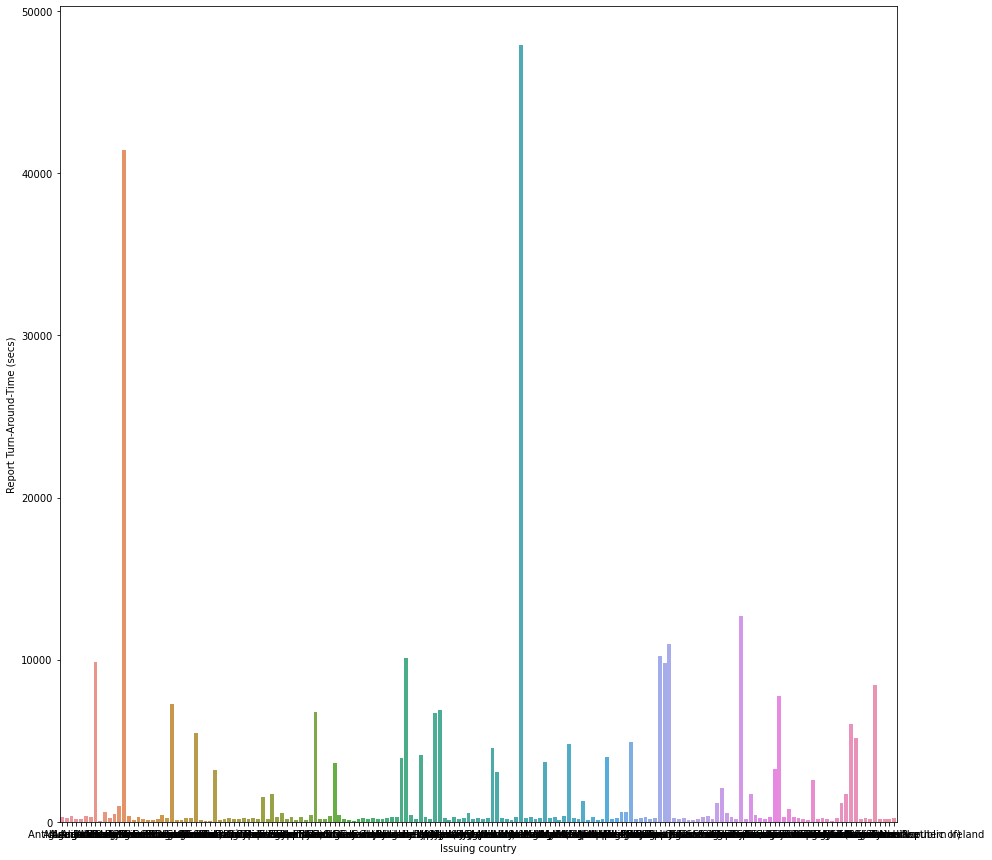

In [57]:
tmp = report.groupby('Issuing country').agg({'Report Turn-Around-Time (secs)': np.nanmean})
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x="Issuing country", y="Report Turn-Around-Time (secs)", data=tmp.reset_index(), ax = ax )

In [68]:
# Selecting top 40 countries

top_countries = tmp.reset_index().sort_values(by = 'Report Turn-Around-Time (secs)', ascending = False)[0:39]['Issuing country'].values

sel = report[report['Issuing country'].isin(top_countries)]

<AxesSubplot:xlabel='Issuing country', ylabel='Report Turn-Around-Time (secs)'>

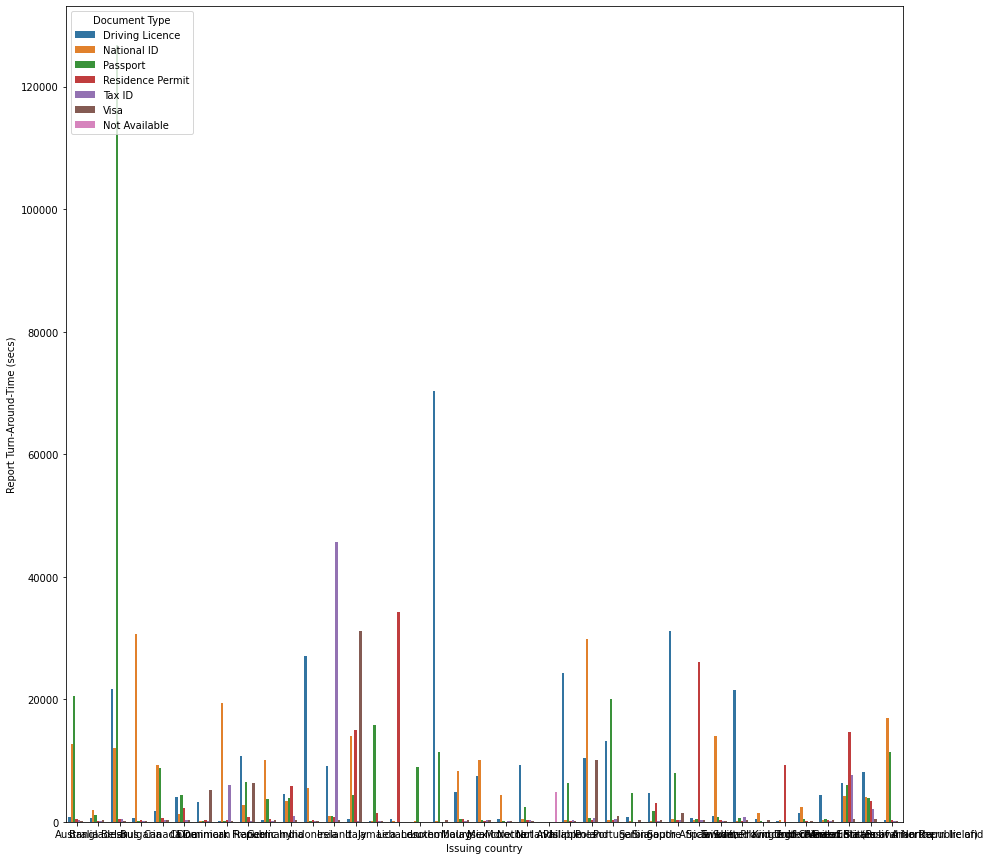

In [69]:
tmp = sel.groupby(['Issuing country','Document Type']).agg({'Report Turn-Around-Time (secs)': np.nanmean})
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x="Issuing country", y="Report Turn-Around-Time (secs)", hue = 'Document Type', data=tmp.reset_index(), ax = ax )

In [73]:
tmp.sort_values(by = 'Report Turn-Around-Time (secs)', ascending = False)

,,Report Turn-Around-Time (secs)
Issuing country,Document Type,
Belarus,Passport,126767.421053
Luxembourg,Driving Licence,70329.875000
Ireland,Tax ID,45613.750000
Lebanon,Residence Permit,34269.000000
Italy,Visa,31106.234568
...,...,...
Jamaica,Tax ID,119.000000
Indonesia,Tax ID,115.200000
Bangladesh,Residence Permit,109.000000


# Documents difficiles en général?

In [76]:
tmp = report.groupby('Document Type').agg({'Report Turn-Around-Time (secs)': np.nanmean})
tmp.sort_values(by = 'Report Turn-Around-Time (secs)', ascending = False)

,Report Turn-Around-Time (secs)
Document Type,
Driving Licence,5972.347940
Residence Permit,5410.490551
Not Available,4920.030779
National ID,4486.138685
Passport,4262.876826
Tax ID,2215.965217
Visa,2132.585632


In [ ]:
# DLicences and Residence Permit, Not avalaible (inclassables), NID and Passport take significantly more

# Fraud Assessment

In [97]:
tmp = report.merge(h_a, how = 'left', on = 'Report ID')

for col in tmp.columns:
    print(col, ':', np.sum(tmp[col].isnull()))

Report ID : 0
Client ID : 0
Fraud Result : 0
Document Type : 0
Issuing country : 0
Report Completed Date : 0
Report Turn-Around-Time (secs) : 0
Task ID : 0
Task Type : 0
Task Turn-Around-Time (secs) : 0
Agency (Manual Processing Organisation) : 0
Agent Seniority : 0


In [98]:
tmp[tmp['Report ID'] == 102730387]

,Report ID,Client ID,Fraud Result,Document Type,Issuing country,Report Completed Date,Report Turn-Around-Time (secs),Task ID,Task Type,Task Turn-Around-Time (secs),Agency (Manual Processing Organisation),Agent Seniority
0,102730387,14,Clear,Passport,Philippines,2021-02-11,147.0,44620808,Extraction,58.0,2,Senior
1,102730387,14,Clear,Passport,Philippines,2021-02-11,147.0,44620809,Fraud Assessment,14.0,2,Senior
2,102730387,14,Clear,Passport,Philippines,2021-02-11,147.0,44620727,Classification,35.0,5,Junior


In [99]:
# 3 types de tasks, pas toujours la meme personne

tmp['Task Type'].value_counts()

Fraud Assessment    47973
Extraction          46174
Classification      19899
Name: Task Type, dtype: int64

In [100]:
# Y a t il une difference entre Agences?

In [105]:
a = tmp.groupby('Agency (Manual Processing Organisation)').agg({'Report ID': 'count'})
a

,Report ID
Agency (Manual Processing Organisation),
1,37427
2,8249
3,6756
4,33594
5,28020


In [106]:
b = tmp.groupby(['Agency (Manual Processing Organisation)','Task Type']).agg({'Task Turn-Around-Time (secs)': np.nanmean})
b

Task Turn-Around-Time (secs)
Agency (Manual Processing Organisation) Task Type                                     
1                                       Classification                     2034.314974
                                        Extraction                          493.278242
                                        Fraud Assessment                   3154.472056
2                                       Classification                      467.977673
                                        Extraction                          743.567935
                                        Fraud Assessment                   4210.925123
3                                       Classification                     1856.643101
                                        Extraction                          648.284417
                                        Fraud Assessment                   2242.532344
4                                       Classification                     2665.822375
                                        Extraction                          836.057225
                                        Fraud Assessment                   3498.911587
5                                       Classification                     1532.277699
                                        Extraction                          388.384575
                                        Fraud Assessment                   4448.586286

In [111]:
c = a.join(b).reset_index()
c

,Agency (Manual Processing Organisation),Task Type,Report ID,Task Turn-Around-Time (secs)
0,1,Classification,37427,2034.314974
1,1,Extraction,37427,493.278242
2,1,Fraud Assessment,37427,3154.472056
3,2,Classification,8249,467.977673
4,2,Extraction,8249,743.567935
5,2,Fraud Assessment,8249,4210.925123
6,3,Classification,6756,1856.643101
7,3,Extraction,6756,648.284417
8,3,Fraud Assessment,6756,2242.532344
9,4,Classification,33594,2665.822375


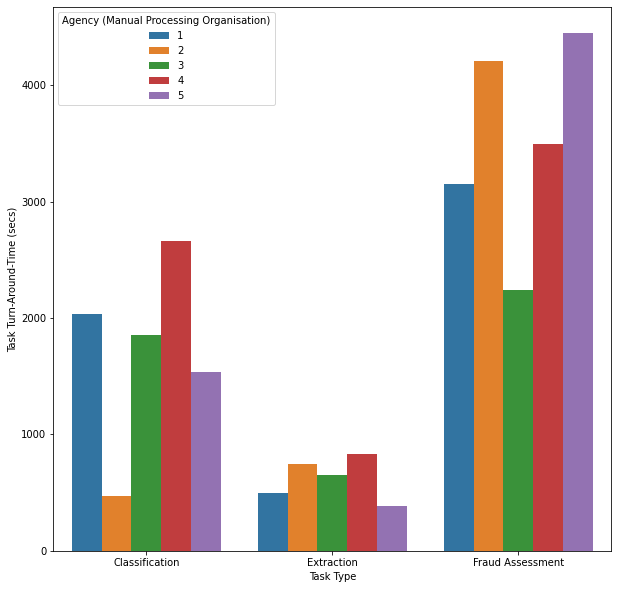

In [113]:
fig, ax = plt.subplots(figsize = (10,10))

ax = sns.barplot(x = 'Task Type', 
                 y = 'Task Turn-Around-Time (secs)', 
                 hue = 'Agency (Manual Processing Organisation)', data = c)

In [119]:
# Are the tasks that take the most time most likely suspicious?

tmp['Fraud Result'].value_counts()

Clear                  86397
Cannot be processed    13931
Suspected              13718
Name: Fraud Result, dtype: int64

In [127]:
zaz = tmp.groupby(['Fraud Result','Issuing country']).agg({'Report Turn-Around-Time (secs)': np.nanmean}).reset_index()


In [128]:
plot_df = zaz[zaz['Issuing country'].isin(top_countries)]

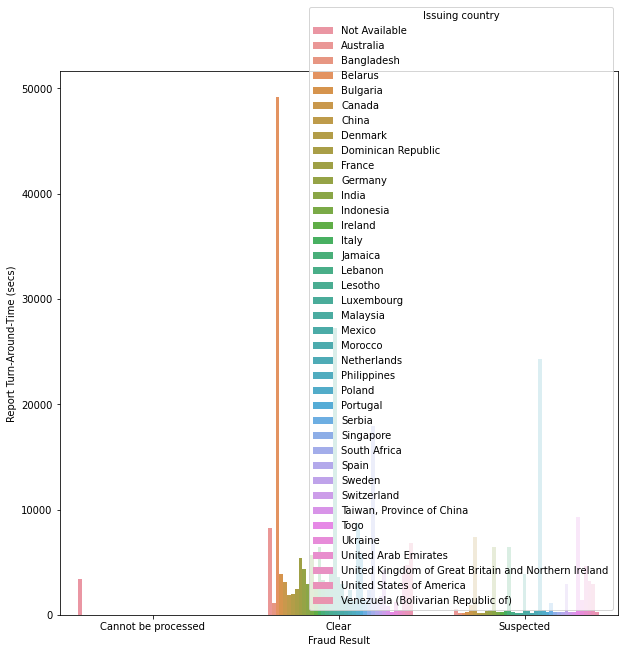

In [130]:
fig, ax = plt.subplots(figsize = (10,10))

ax = sns.barplot(x = 'Fraud Result', 
                 y = 'Report Turn-Around-Time (secs)', 
                 hue = 'Issuing country', data = plot_df)

In [114]:
# top countries and fraud?

top_countries

array(['Luxembourg', 'Belarus', 'South Africa', 'Portugal', 'Philippines',
       'Indonesia', 'Australia', 'Poland',
       'Venezuela (Bolivarian Republic of)', 'Switzerland', 'Bulgaria',
       'Jamaica', 'France', 'Italy',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'United States of America', 'Not Available', 'Mexico', 'Lebanon',
       'Ireland', 'Netherlands', 'India', 'Malaysia', 'Germany', 'Sweden',
       'China', 'Lesotho', 'Togo', 'Singapore', 'Spain',
       'United Arab Emirates', 'Dominican Republic', 'Denmark', 'Morocco',
       'Ukraine', 'Serbia', 'Bangladesh', 'Taiwan, Province of China'],
      dtype=object)

In [132]:
report.head()

,Report ID,Client ID,Fraud Result,Document Type,Issuing country,Report Completed Date,Report Turn-Around-Time (secs)
0,102730387,14,Clear,Passport,Philippines,2021-02-11,147.0
1,138965999,15,Clear,Passport,United Kingdom of Great Britain and Northern I...,2021-03-13,260.0
2,117919008,19,Suspected,Driving Licence,United States of America,2021-01-13,160.0
3,123459413,3,Clear,Passport,Lithuania,2021-01-30,200.0
4,109493562,7,Clear,Driving Licence,France,2021-03-28,373.0


In [133]:
h_a.head()

,Report ID,Task ID,Task Type,Task Turn-Around-Time (secs),Agency (Manual Processing Organisation),Agent Seniority
0,136115188,69038945,Fraud Assessment,39.0,3,Junior
1,124025203,60575464,Extraction,118.0,3,Junior
2,113034309,52564826,Fraud Assessment,35.0,3,Junior
3,133661310,67305979,Extraction,86.0,3,Junior
4,133800920,67408713,Fraud Assessment,51.0,3,Junior


In [134]:
h_a[h_a['Report ID'] == 102730387]

,Report ID,Task ID,Task Type,Task Turn-Around-Time (secs),Agency (Manual Processing Organisation),Agent Seniority
44491,102730387,44620808,Extraction,58.0,2,Senior
49944,102730387,44620809,Fraud Assessment,14.0,2,Senior
99084,102730387,44620727,Classification,35.0,5,Junior


In [135]:
report[report['Report ID'] == 102730387]

,Report ID,Client ID,Fraud Result,Document Type,Issuing country,Report Completed Date,Report Turn-Around-Time (secs)
0,102730387,14,Clear,Passport,Philippines,2021-02-11,147.0


In [ ]:
# What agency is good with what?

# extraction


In [ ]:
# agencies taskforce eval?



# Impact from seniority?

In [ ]:
# pour toutes les taches liées a la suspicion de fraude, regarder si les seniors sont plus rapides que les juniors

In [203]:
tmp = h_a.groupby(['Agent Seniority','Task Type', 'Agency (Manual Processing Organisation)']).agg({'Task Turn-Around-Time (secs)': np.nanmean})
tmp

Task Turn-Around-Time (secs)
Agent Seniority Task Type        Agency (Manual Processing Organisation)                              
Junior          Classification   1                                                         1698.192883
                                 2                                                          544.424242
                                 3                                                          606.985384
                                 4                                                         2895.208397
                                 5                                                         1283.171642
                Extraction       1                                                          611.737431
                                 2                                                          130.229730
                                 3                                                          836.104712
                                 4                                                          834.638207
                                 5                                                          354.387697
                Fraud Assessment 1                                                         3370.716647
                                 2                                                          101.554054
                                 3                                                         1695.392894
                                 4                                                         3761.076385
                                 5                                                         4936.048136
Senior          Classification   1                                                         2738.479582
                                 2                                                          465.925311
                                 3                                                         4763.070822
                                 4                                                         2195.243697
                                 5                                                         2064.148502
                Extraction       1                                                          239.279099
                                 2                                                          757.584929
                                 3                                                          222.736655
                                 4                                                          839.038489
                                 5                                                          463.062623
                Fraud Assessment 1                                                         2673.893852
                                 2                                                         4300.760709
                                 3                                                         3440.440812
                                 4                                                         2931.331850
                                 5                                                         3371.570766

<AxesSubplot:xlabel='Agent Seniority', ylabel='Task Turn-Around-Time (secs)'>

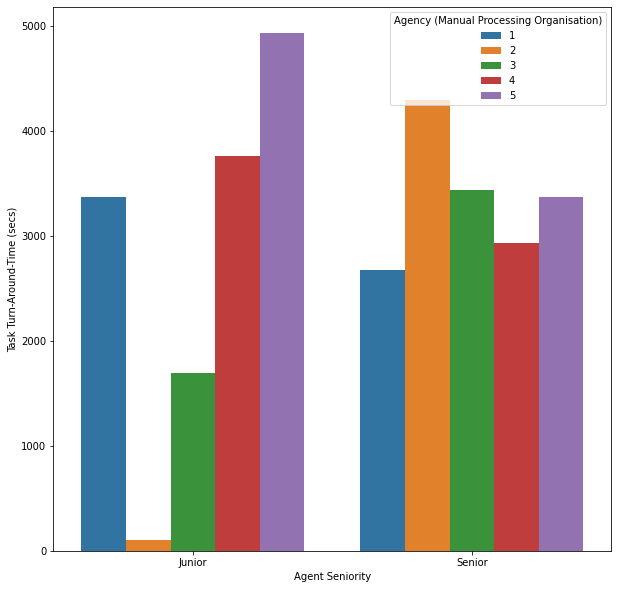

In [207]:
fig, ax = plt.subplots(figsize = (10,10))

sns.barplot(x = 'Agent Seniority', 
            y = 'Task Turn-Around-Time (secs)', 
            hue = 'Agency (Manual Processing Organisation)', 
            data = tmp.reset_index()[tmp.reset_index()['Task Type'] == 'Fraud Assessment'], 
            ax = ax)

In [143]:
# Qui est plus suspicieux et du coup plus de temps?

tmp = report.merge(h_a, how = 'left', on = 'Report ID')

In [149]:
tmp.groupby(['Agency (Manual Processing Organisation)','Fraud Result']).agg({'Fraud Result': 'count'})

Fraud Result
Agency (Manual Processing Organisation) Fraud Result                     
1                                       Cannot be processed          4620
                                        Clear                       28358
                                        Suspected                    4449
2                                       Cannot be processed          1022
                                        Clear                        6221
                                        Suspected                    1006
3                                       Cannot be processed           744
                                        Clear                        5223
                                        Suspected                     789
4                                       Cannot be processed          4187
                                        Clear                       25347
                                        Suspected                    4060
5                                       Cannot be processed          3358
                                        Clear                       21248
                                        Suspected                    3414

In [168]:
# y a t il des documents / pays pour lesquels les agences sont plus suspicieuses

zaza = tmp.groupby(['Agency (Manual Processing Organisation)','Fraud Result']).agg({'Issuing country': 'value_counts'})

In [161]:
zaza.loc[(5,'Suspected')]

,Issuing country
Issuing country,
United States of America,953
India,556
United Kingdom of Great Britain and Northern Ireland,476
France,229
Italy,161
...,...
Senegal,1
Slovenia,1
Togo,1


In [169]:
zaza

Issuing country
Agency (Manual Processing Organisation) Fraud Result        Issuing country                                                    
1                                       Cannot be processed Not Available                                                  4620
                                        Clear               United States of America                                       7765
                                                            India                                                          4421
                                                            United Kingdom of Great Britain and Northern Ir...             4311
                                                            France                                                         1611
...                                                                                                                         ...
5                                       Suspected           Senegal                                                           1
                                                            Slovenia                                                          1
                                                            Togo                                                              1
                                                            Viet Nam                                                          1
                                                            Yemen                                                             1

[917 rows x 1 columns]

In [173]:
zizi = tmp.groupby('Agency (Manual Processing Organisation)').agg({'Issuing country': 'value_counts'})

In [176]:
zizi = zizi.rename(columns = {'Issuing country': 'total_count'})

In [179]:
zozo = zaza.join(zizi)

In [182]:
zozo['%'] = (zozo['Issuing country']/zozo['total_count'])*100

In [183]:
zozo

Issuing country  \
Agency (Manual Processing Organisation) Issuing country Fraud Result                    
1                                       Albania         Clear                      14   
                                                        Suspected                   2   
                                        Algeria         Clear                      39   
                                                        Suspected                   4   
                                        Angola          Clear                       6   
...                                                                               ...   
5                                       Viet Nam        Suspected                   1   
                                        Yemen           Clear                       4   
                                                        Suspected                   1   
                                        Zambia          Clear                       5   
                                        Zimbabwe        Clear                      19   

                                                                      total_count  \
Agency (Manual Processing Organisation) Issuing country Fraud Result                
1                                       Albania         Clear                  16   
                                                        Suspected              16   
                                        Algeria         Clear                  43   
                                                        Suspected              43   
                                        Angola          Clear                   6   
...                                                                           ...   
5                                       Viet Nam        Suspected               8   
                                        Yemen           Clear                   5   
                                                        Suspected               5   
                                        Zambia          Clear                   5   
                                        Zimbabwe        Clear                  19   

                                                                               %  
Agency (Manual Processing Organisation) Issuing country Fraud Result              
1                                       Albania         Clear          87.500000  
                                                        Suspected      12.500000  
                                        Algeria         Clear          90.697674  
                                                        Suspected       9.302326  
                                        Angola          Clear         100.000000  
...                                                                          ...  
5                                       Viet Nam        Suspected      12.500000  
                                        Yemen           Clear          80.000000  
                                                        Suspected      20.000000  
                                        Zambia          Clear         100.000000  
                                        Zimbabwe        Clear         100.000000  

[917 rows x 3 columns]

IndexError: index 5 is out of bounds for axis 0 with size 5

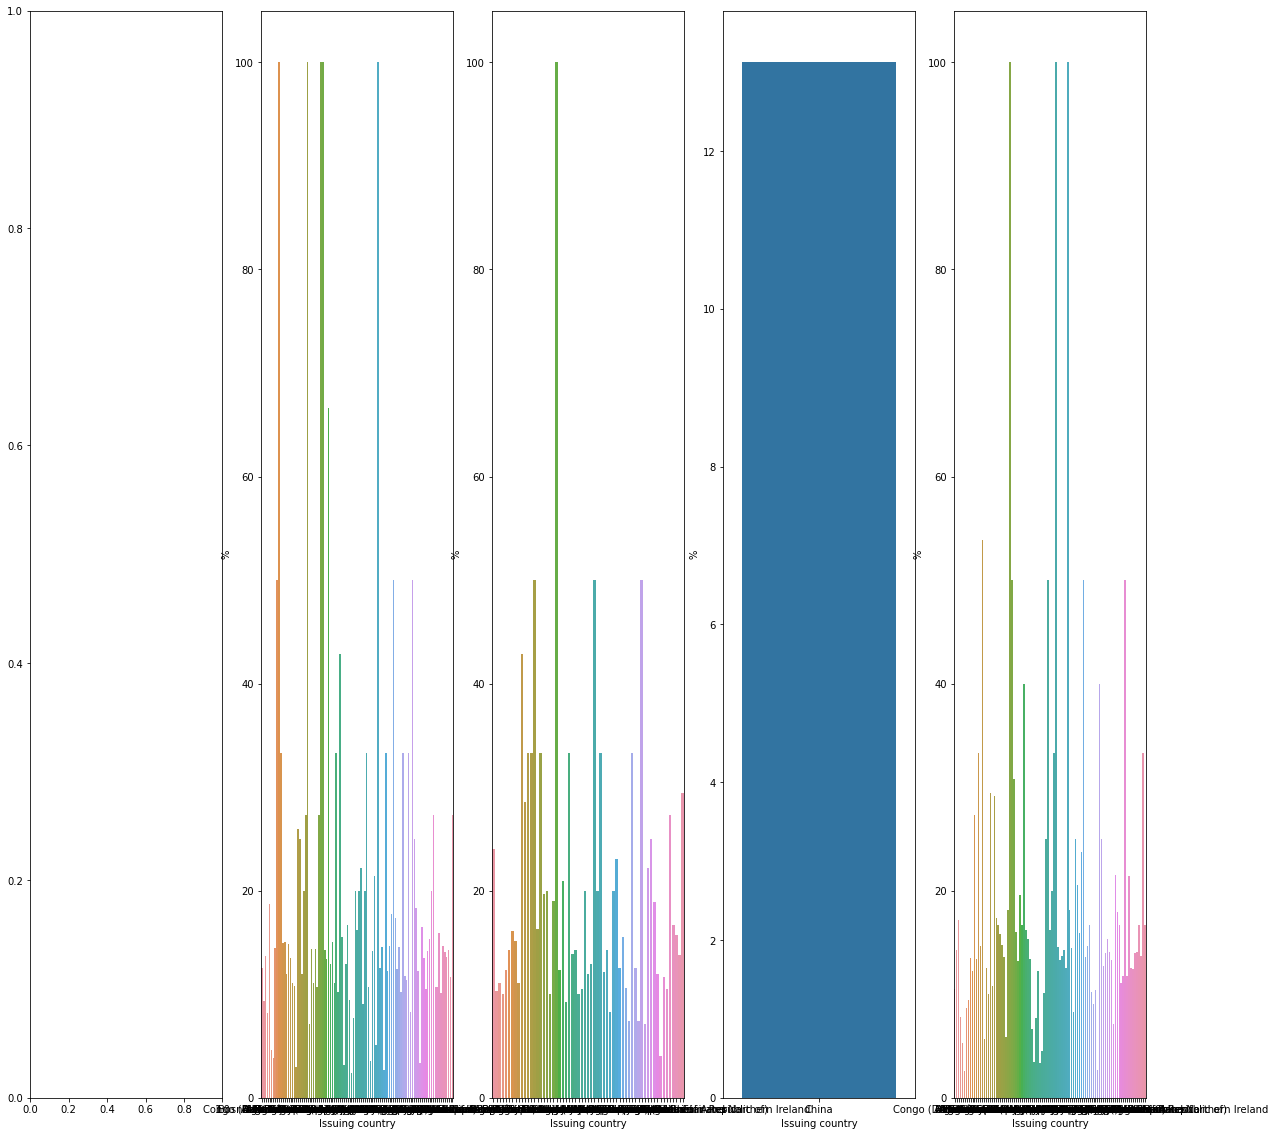

In [201]:
fig, ax = plt.subplots(1,5, figsize = (20,20))

for k in range(5):
    k += 1
    sns.barplot(x = 'Issuing country', 
                     y = '%', 
                     data = zozo.loc[(k,slice(None),'Suspected')].\
                     rename(columns = {'Issuing country': 'count_country'}).reset_index(), ax = ax[k])